In [1]:
# for analyzing the .mat files produced by SR785 Viewer program (on Hexagon4, Coffee Lab)
# Preston Huft, Spring 2020

In [6]:
import scipy.io
import matplotlib.pyplot as plt
from numpy import *

In [33]:
# put your files here
mat960 = scipy.io.loadmat('20200109_960powerspectrum.MAT')
mat780 = scipy.io.loadmat('20200109_780powerspectrum.MAT') # check the pzt file too
mat780b = scipy.io.loadmat('20200109_780Bpowerspectrum.MAT')

In [34]:
mat960,mat780,mat780b # see what the keys are; i.e. whatever filenames you entered on the SR785

({'srs960rin': array([[0.0000000e+00+0.j, 6.8786835e-06+0.j],
         [1.2800000e+02+0.j, 4.0210762e-06+0.j],
         [2.5600000e+02+0.j, 6.7071647e-07+0.j],
         ...,
         [1.0214400e+05+0.j, 6.9154938e-15+0.j],
         [1.0227200e+05+0.j, 7.2140839e-15+0.j],
         [1.0240000e+05+0.j, 7.6298153e-15+0.j]], dtype=complex64)},
 {'srs780arin': array([[0.0000000e+00+0.j, 6.9086118e-06+0.j],
         [1.2800000e+02+0.j, 4.0401105e-06+0.j],
         [2.5600000e+02+0.j, 6.7503720e-07+0.j],
         ...,
         [1.0214400e+05+0.j, 6.8418908e-15+0.j],
         [1.0227200e+05+0.j, 6.5719131e-15+0.j],
         [1.0240000e+05+0.j, 7.4678075e-15+0.j]], dtype=complex64)},
 {'srs780brin': array([[0.0000000e+00+0.j, 6.3173607e-06+0.j],
         [1.2800000e+02+0.j, 3.7189366e-06+0.j],
         [2.5600000e+02+0.j, 6.2683119e-07+0.j],
         ...,
         [1.0214400e+05+0.j, 2.3688076e-12+0.j],
         [1.0227200e+05+0.j, 2.5818158e-12+0.j],
         [1.0240000e+05+0.j, 2.5233522e-12+0

In [54]:
# frequency [Hz], voltage [V] (if you selected linear/linear when saving the .mat file)
hz1,v1 = mat960['srs960rin'].transpose()
hz2,v2 = mat780['srs780arin'].transpose()
hz3,v3 = mat780b['srs780brin'].transpose()

# the DC voltage recorded
vdc1 = .80
vdc2 = .67
vdc3 = vdc1

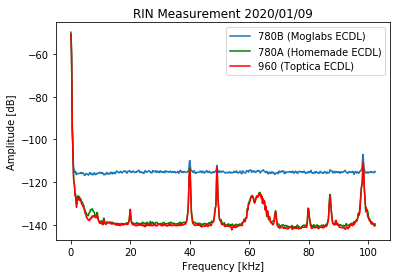

In [53]:
fig, ax = plt.subplots()
ax.plot(hz3/1e3,10*log10(v3/vdc3), label='780B (Moglabs ECDL)',) # note the base 10 log and 
ax.plot(hz2/1e3,10*log10(v2/vdc2), label='780A (Homemade ECDL)',c='green')
ax.plot(hz1/1e3,10*log10(v1/vdc1), label='960 (Toptica ECDL)',c='red')
ax.set_title("RIN Measurement 2020/01/09")
ax.set_xlabel("Frequency [kHz]")
ax.set_ylabel("Amplitude [dB]")
ax.legend()